In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

## prestorm 

In [2]:
# ### load the data as a dataframe--------------------------------------------------------------------------------------

os.chdir('C:/Users/Lexi/Documents/Research/Outwasher Paper/GIS data/')
prestorm_points_df = pd.read_csv("raster_points.csv")

# get the column that contains the elevations
prestorm_elevations = prestorm_points_df['grid_code']  # same as RawMatrix[,3]

alongshore_length_feature_class = 4000  # in meters, along-shore side of rectangle from GIS (barrier length)
num_cols_domain = int(alongshore_length_feature_class / 10)  # we specified 10x10 m cells
num_rows_domain = int(len(prestorm_elevations)/num_cols_domain)  # this will be the width of the island
MHW = 0.36  # meters NAVD88 (subtract 0.36 m from NAVD88 elevations to get MHW elevations)

prestorm_elevations = prestorm_elevations - MHW  # convert elevations from NAVD88 to MHW

# organizing the list of elevations into an array
elev_array = np.zeros([num_rows_domain, num_cols_domain])
start = 0
end = start + num_cols_domain
for row in range(num_rows_domain):
    elev_array[row, :] = prestorm_elevations[start:end]
    start += num_cols_domain
    end += num_cols_domain

elev_array = elev_array / 10
section1_pre = elev_array[147:188, 98:148] # black box
section2_pre = elev_array[147:188, 148:198] # pink box
section3_pre = elev_array[147:188, 248:298] # blue box
section4_pre = elev_array[147:188, 198:248] # orange box

## post-storm

In [3]:
### plotting the post storm
post_points_df = pd.read_csv("post_storm_points.csv")
#
# get the column that contains the elevations
post_elevations = post_points_df['grid_code']  # same as RawMatrix[,3]

# adjusting from NAVD88 to MHW
post_elevations = post_elevations - MHW  # convert elevations from NAVD88 to MHW

# plot the entire domain out
post_elev_array = np.zeros([num_rows_domain, num_cols_domain])
start = 0
end = start + num_cols_domain
for row in range(num_rows_domain):
    post_elev_array[row, :] = post_elevations[start:end]
    start += num_cols_domain
    end += num_cols_domain

# set all values less than 0 to -3 m
for r in range(150):
    for c in range(num_cols_domain):
        if post_elev_array[r, c] <= -0.5:
            post_elev_array[r, c] = -3

# convert to dam
post_elev_array = post_elev_array / 10
section1_post = post_elev_array[147:188, 98:148] # black box
section2_post = post_elev_array[147:188, 148:198] # pink box
section3_post = post_elev_array[147:188, 248:298] # blue box
section4_post = post_elev_array[147:188, 198:248] # orange box

## plots

In [4]:
xlabel = "alongshore distance (m)"
ylabel = "cross-shore distance (m)"
plt.rcParams.update({"font.size": 15})


## configuration 1

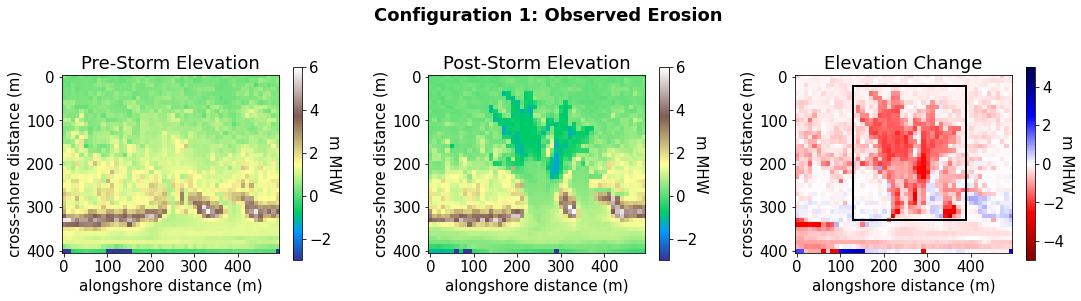

In [70]:
plt.rcParams.update({"font.size": 15})
xlabel = "alongshore distance (m)"
ylabel = "cross-shore distance (m)"
shrink = 0.15

elev_change1 = section1_post - section1_pre

# plot pre-storm section -------------------------------------------------------------------------------------------------
fig1 = plt.figure(figsize=[18,13])
fig1.suptitle('Configuration 1: Observed Erosion', weight="bold")
ax1 = fig1.add_subplot(131)
mat1_pre = ax1.matshow(
    section1_pre * 10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat1_pre, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax1.set_title("Pre-Storm Elevation")
ax1.set_ylabel(ylabel)
ax1.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section1_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section1_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)


# plot post-storm section -------------------------------------------------------------------------------------------------
ax1 = fig1.add_subplot(132)
mat1_post = ax1.matshow(
    section1_post*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat1_post, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax1.set_title("Post-Storm Elevation")
ax1.set_ylabel(ylabel)
ax1.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section1_post)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section1_post)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)

# plot elevation change --------------------------------------------------------------------------------------------------
ax1 = fig1.add_subplot(133)
mat1_dif = ax1.matshow(
    elev_change1*10,
    cmap="seismic_r",
    vmin=-5,
    vmax=5,
)
cbar = fig1.colorbar(mat1_dif, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax1.set_title("Elevation Change")
ax1.set_ylabel(ylabel)
ax1.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section1_post)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section1_post)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)

fig1.subplots_adjust(wspace=0.35, top=1.5)

ax1.add_patch(plt.Rectangle((13, 33), 26, -31, lw=2, ec="k", fc="none"))


In [52]:
channel_erosion1_m = np.sum(elev_change1[3:33, 13:39]*10) # m
channel_erosion1_m3 = channel_erosion1_m*10*10 
print(round(channel_erosion1_m3, -2))

-58300.0


## configuration 2

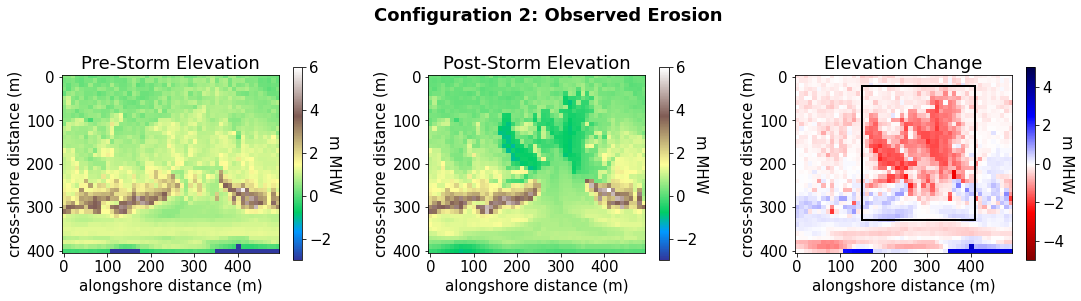

In [69]:
elev_change2 = section2_post - section2_pre

# plot pre-storm section -------------------------------------------------------------------------------------------------
fig2 = plt.figure(figsize=[18,13])
fig2.suptitle('Configuration 2: Observed Erosion', weight="bold")
ax2 = fig2.add_subplot(131)
mat2_pre = ax2.matshow(
    section2_pre * 10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig2.colorbar(mat2_pre, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax2.set_title("Pre-Storm Elevation")
ax2.set_ylabel(ylabel)
ax2.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section2_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section2_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)


# plot post-storm section -------------------------------------------------------------------------------------------------
ax2 = fig2.add_subplot(132)
mat2_pre = ax2.matshow(
    section2_post * 10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig2.colorbar(mat2_pre, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax2.set_title("Post-Storm Elevation")
ax2.set_ylabel(ylabel)
ax2.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section2_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section2_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)

# plot elevation change --------------------------------------------------------------------------------------------------
ax2 = fig2.add_subplot(133)
mat2_dif = ax2.matshow(
    elev_change2*10,
    cmap="seismic_r",
    vmin=-5,
    vmax=5,
)
cbar = fig2.colorbar(mat2_dif, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax2.set_title("Elevation Change")
ax2.set_ylabel(ylabel)
ax2.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section2_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section2_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)

fig2.subplots_adjust(wspace=0.35, top=1.5)

ax2.add_patch(plt.Rectangle((15, 33), 26, -31, lw=2, ec="k", fc="none"))


In [59]:
channel_erosion2_m = np.sum(elev_change2[3:33, 15:42]*10) # m
channel_erosion2_m3 = channel_erosion2_m*10*10 
print(round(channel_erosion2_m3, -2))

-45100.0


## configuration 3

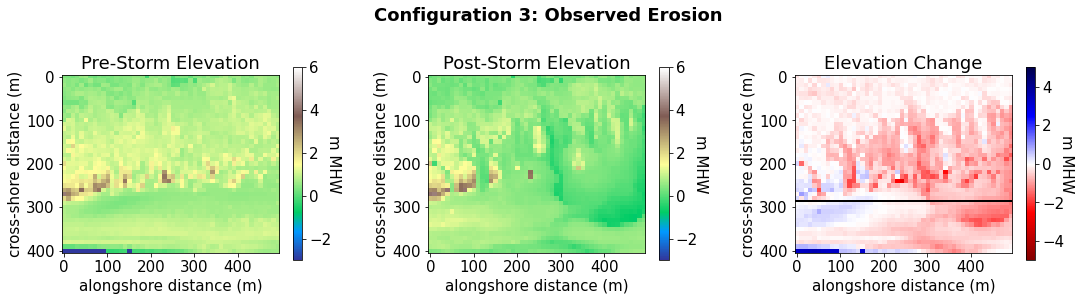

In [68]:
elev_change3 = section3_post - section3_pre

# plot pre-storm section -------------------------------------------------------------------------------------------------
fig3 = plt.figure(figsize=[18,13])
fig3.suptitle('Configuration 3: Observed Erosion', weight="bold")
ax3 = fig3.add_subplot(131)
mat3_pre = ax3.matshow(
    section3_pre * 10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig3.colorbar(mat3_pre, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax3.set_title("Pre-Storm Elevation")
ax3.set_ylabel(ylabel)
ax3.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section3_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section3_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)


# plot post-storm section -------------------------------------------------------------------------------------------------
ax3 = fig3.add_subplot(132)
mat3_pre = ax3.matshow(
    section3_post * 10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig3.colorbar(mat3_pre, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax3.set_title("Post-Storm Elevation")
ax3.set_ylabel(ylabel)
ax3.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section3_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section3_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)

# plot elevation change --------------------------------------------------------------------------------------------------
ax3 = fig3.add_subplot(133)
mat3_dif = ax3.matshow(
    elev_change3*10,
    cmap="seismic_r",
    vmin=-5,
    vmax=5,
)
cbar = fig3.colorbar(mat3_dif, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax3.set_title("Elevation Change")
ax3.set_ylabel(ylabel)
ax3.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section3_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section3_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)

fig3.subplots_adjust(wspace=0.35, top=1.5)

plt.hlines(28.5, -0.5, 49.5, color="k", linestyles='solid', linewidth=2)


In [56]:
back_barrier_dune_erosion3_m = np.sum(elev_change3[0:29]*10) # m
back_barrier_dune_erosion3_m3 = back_barrier_dune_erosion3_m*10*10 
print(round(back_barrier_dune_erosion3_m3, -2))

-58900.0


## configration 4

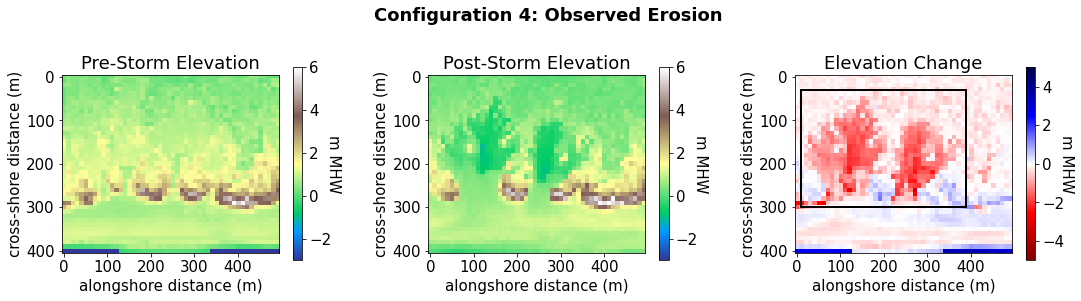

In [79]:
elev_change4 = section4_post - section4_pre

# plot pre-storm section -------------------------------------------------------------------------------------------------
fig4 = plt.figure(figsize=[18,13])
fig4.suptitle('Configuration 4: Observed Erosion', weight="bold")
ax4 = fig4.add_subplot(131)
mat4_pre = ax4.matshow(
    section4_pre * 10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig4.colorbar(mat4_pre, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax4.set_title("Pre-Storm Elevation")
ax4.set_ylabel(ylabel)
ax4.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section4_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section4_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)


# plot post-storm section -------------------------------------------------------------------------------------------------
ax4 = fig4.add_subplot(132)
mat4_post = ax4.matshow(
    section4_post * 10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig4.colorbar(mat4_post, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax4.set_title("Post-Storm Elevation")
ax4.set_ylabel(ylabel)
ax4.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section4_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section4_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)

# plot elevation change --------------------------------------------------------------------------------------------------
ax4 = fig4.add_subplot(133)
mat4_dif = ax4.matshow(
    elev_change4*10,
    cmap="seismic_r",
    vmin=-5,
    vmax=5,
)
cbar = fig4.colorbar(mat4_dif, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=10)
ax4.set_title("Elevation Change")
ax4.set_ylabel(ylabel)
ax4.set_xlabel(xlabel)
plt.gca().xaxis.tick_bottom()

xtick_max = np.shape(section4_pre)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
ytick_max = np.shape(section4_pre)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.yticks(y_ticks, y_tick_labels)

fig4.subplots_adjust(wspace=0.35, top=1.5)

ax4.add_patch(plt.Rectangle((1, 30), 38, -27, lw=2, ec="k", fc="none"))


In [84]:
back_barrier_dune_erosion4_m = np.sum(elev_change4[5:29, 2:38]*10) # m
back_barrier_dune_erosion4_m3 = back_barrier_dune_erosion4_m*10*10 
print(round(back_barrier_dune_erosion4_m3, -2))

-55200.0
